In [281]:
%matplotlib widget

In [282]:
from sympy import Symbol, sin, atan, exp, solve, diff, simplify,Eq
from sympy.plotting import plot, plot3d


In [283]:
b = [Symbol(f'b_{i}', positive=True, real=True) for i in range(11)]
Fz = Symbol('F_z', positive=True, real=True)
x = Symbol('x', real=True)

def pacejka96():
    C = b[0]
    D = (b[1] * Fz + b[2]) * Fz
    B=((b[3]*Fz**2+b[4]*Fz)*exp(-b[5]*Fz))/(C*D)
    E = b[6] * Fz**2 +b[7] * Fz + b[8]
    Sh=b[9]*Fz+b[10]
    
    X = x + Sh
    y = D * sin(C * atan(B * X - E * ( B * X - atan(B * X))))
    Y = y
    return Y

In [284]:
# Pacejka coefficients
slip_angle_b = [
1.6, -150, 1500, 0, 229, -0.4, 0, 0, 0, 0, 0
]
slip_angle_b2 = [
1.45, -150, 1500, 0, 400, -0.4, 0, 0, 0, 0, 0
]

slip_ratio_b = [
1.7, -150, 1500, 0, 700, -0.8, 0, 0, 0, 0, 0
]

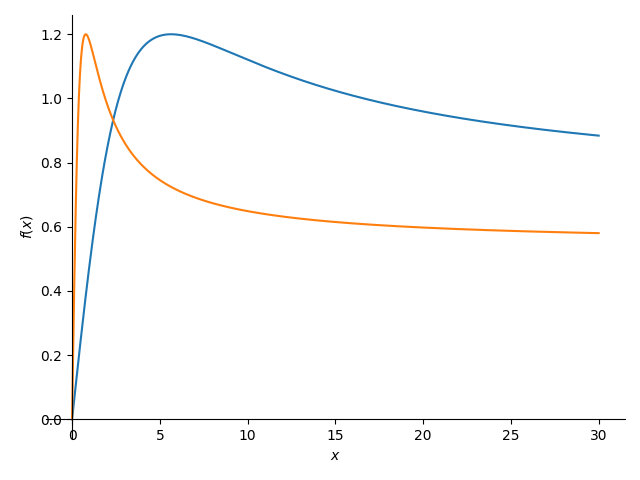

In [285]:
%matplotlib widget

slip_angle_formula = pacejka96().subs({sym: val for sym, val in zip(b, slip_angle_b)})
slip_angle_formula2 = pacejka96().subs({sym: val for sym, val in zip(b, slip_angle_b2)})
slip_ratio_formula = pacejka96().subs({sym: val for sym, val in zip(b, slip_ratio_b)})

plot(abs((slip_angle_formula / (Fz * 1000)).subs({Fz: 2})), abs((slip_ratio_formula / (Fz * 1000)).subs({Fz: 2})), (x, 0, 30))